In [1]:
%matplotlib widget
import obspy
from obspy.signal.trigger import classic_sta_lta, recursive_sta_lta, aic_simple
from obspy.signal.trigger import plot_trigger
from obspy.signal.trigger import coincidence_trigger
from obspy.signal.cross_correlation import correlation_detector
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plot_working
import matplotlib.ticker as ticker
from datetime import datetime
from datetime import timedelta

In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
chan = 'GHZ'
#statlist = [ 'A01' ,'A03' , 'A05' , 'A07' , 'A09' , 'A11' , 'A13' , 'A15' , 'A17' , 'A19' ]
statlist = [ 'A01' ,'A02' , 'A03' , 'A04' , 'A05' , 'A06' , 'A07' , 'A08' , 'A09', 'A10' , 'A11', 'A13', 'A14', 'A19']#, 'A16', 'A17', 'A18', 'A19' ]
#statlist = [ 'B01' ,'B02' , 'B03' , 'B04' , 'B06' , 'B07' , 'B08' , 'B09','B10' , 'B11', 'B12', 'B13' , 'B19' , 'B20']#,'B14','B15','B16','B17','B18','B19', 'B20' ]

day = 15
hr = 15
start_time = obspy.UTCDateTime('2020-1-' + str(day) + 'T00:00:00')+hr*3600
end_time = obspy.UTCDateTime('2020-1-' + str(day) + 'T00:00:00')+(hr+1)*3600
stream = obspy.read("/media/sbrent/Oman3/PASSCAL/Main_deployment/DAYS/" +statlist[0]+ "/*.." + chan +".2020.0" +str(day))

In [4]:
for s in statlist[1:]:
    
    stream += obspy.read("/media/sbrent/Oman3/PASSCAL/Main_deployment/DAYS/" + s + "/*.." + chan + ".2020.0" + str(day))


In [5]:
data = stream.slice(starttime=start_time,endtime=end_time) #look into trim()

In [6]:
waveforms = [w.data for w in data]
times = [t.times() for t in data]
times_mat = [t.times('matplotlib') for t in data]
times_stamp = [t.times('timestamp') for t in data]
#ids = [i.get_id() for i in data]

In [7]:
stream_filt = data.filter('highpass', corners=4, freq=80, zerophase=False)
stream_2 = stream_filt.copy()
#events = coincidence_trigger("classicstalta", 4, 0.5, stream_2, 3, sta=0.2, lta=4)
#events = coincidence_trigger("classicstalta", 10, 0.5, stream_2, 3, sta=0.08, lta=1)
#events = coincidence_trigger("classicstalta", 5, 0.5, stream_2, 3, sta=0.08, lta=1)
#events = coincidence_trigger("classicstalta", 5, 0.5, stream_2, 3, sta=0.08, lta=0.5) #best as of 08/24/2022 at 12:41
#events = coincidence_trigger("classicstalta", 5, 0.4, stream_2, 3, sta=0.08, lta=0.5)  # also good 08/24/2022 at 12:49
#events = coincidence_trigger("classicstalta", 5, 0.6, stream_2, 3, sta=0.08, lta=0.5) # also good 08/24/2022 at 12:52
#events = coincidence_trigger("classicstalta", 5, 0.7, stream_2, 3, sta=0.08, lta=0.5) # also good 08/24/2022 at 12:57
#events = coincidence_trigger("classicstalta", 5, 0.8, stream_2, 3, sta=0.08, lta=0.5)  # also good 08/24/2022 at 13:00


#events = coincidence_trigger("classicstalta", 5, 0.8, stream_2, 3, sta=0.06, lta=0.5) # very good
#events = coincidence_trigger("classicstalta", 5, 0.8, stream_2, 3, sta=0.04, lta=0.3) # even better
events = coincidence_trigger("classicstalta", 5, 0.8, stream_2, 3, sta=0.02, lta=0.2)




#events = coincidence_trigger("classicstalta", 4, 0.5, stream_2, 3, sta=0.08, lta=0.5)
events = pd.DataFrame(events)

In [ ]:
#for i in range(len(events.duration)):
#    if events.duration[i] < 1:
#        print(i)
#        print(events.duration[i])
    #print(len(events.duration[i]))

In [7]:
events.time[147]

2020-01-15T15:06:25.451000Z

In [8]:
events

,time,stations,trace_ids,coincidence_sum,similarity,duration
0,2020-01-15T15:00:02.861000Z,"[A04, A03, A06, A01, A02, A05, A10]","[7F.A04..BHZ, 7F.A03..BHZ, 7F.A06..BHZ, 7F.A01...",7.0,{},0.172
1,2020-01-15T15:00:03.380000Z,"[A04, A03, A06, A02, A01, A05]","[7F.A04..BHZ, 7F.A03..BHZ, 7F.A06..BHZ, 7F.A02...",6.0,{},0.105
2,2020-01-15T15:00:11.307000Z,"[A01, A02, A06]","[7F.A01..BHZ, 7F.A02..BHZ, 7F.A06..BHZ]",3.0,{},0.073
3,2020-01-15T15:00:39.897000Z,"[A04, A03, A02, A01, A06, A05, A10]","[7F.A04..BHZ, 7F.A03..BHZ, 7F.A02..BHZ, 7F.A01...",7.0,{},0.169
4,2020-01-15T15:00:41.145000Z,"[A04, A03, A01, A02, A06]","[7F.A04..BHZ, 7F.A03..BHZ, 7F.A01..BHZ, 7F.A02...",5.0,{},0.107
...,...,...,...,...,...,...
1716,2020-01-15T15:59:53.224000Z,"[A04, A05, A03, A06, A02, A01, A10]","[7F.A04..BHZ, 7F.A05..BHZ, 7F.A03..BHZ, 7F.A06...",7.0,{},0.165
1717,2020-01-15T15:59:53.717000Z,"[A04, A03, A01, A06, A02, A05]","[7F.A04..BHZ, 7F.A03..BHZ, 7F.A01..BHZ, 7F.A06...",6.0,{},0.101
1718,2020-01-15T15:59:56.058000Z,"[A04, A06, A01, A03, A02, A10]","[7F.A04..BHZ, 7F.A06..BHZ, 7F.A01..BHZ, 7F.A03...",6.0,{},0.135
1719,2020-01-15T15:59:56.495000Z,"[A04, A05, A03, A06, A02, A01, A10]","[7F.A04..BHZ, 7F.A05..BHZ, 7F.A03..BHZ, 7F.A06...",7.0,{},0.188


In [ ]:
events.to_csv('/home/sbrent/research/Oman/geo_wave/events_A_' + str(day) +'_' +str(hr)+'.csv')

In [9]:
df_time = events.time
df_duration = events.duration
ct_stations = events.stations
ct_sum = events.coincidence_sum
#df_time[1].timestamp

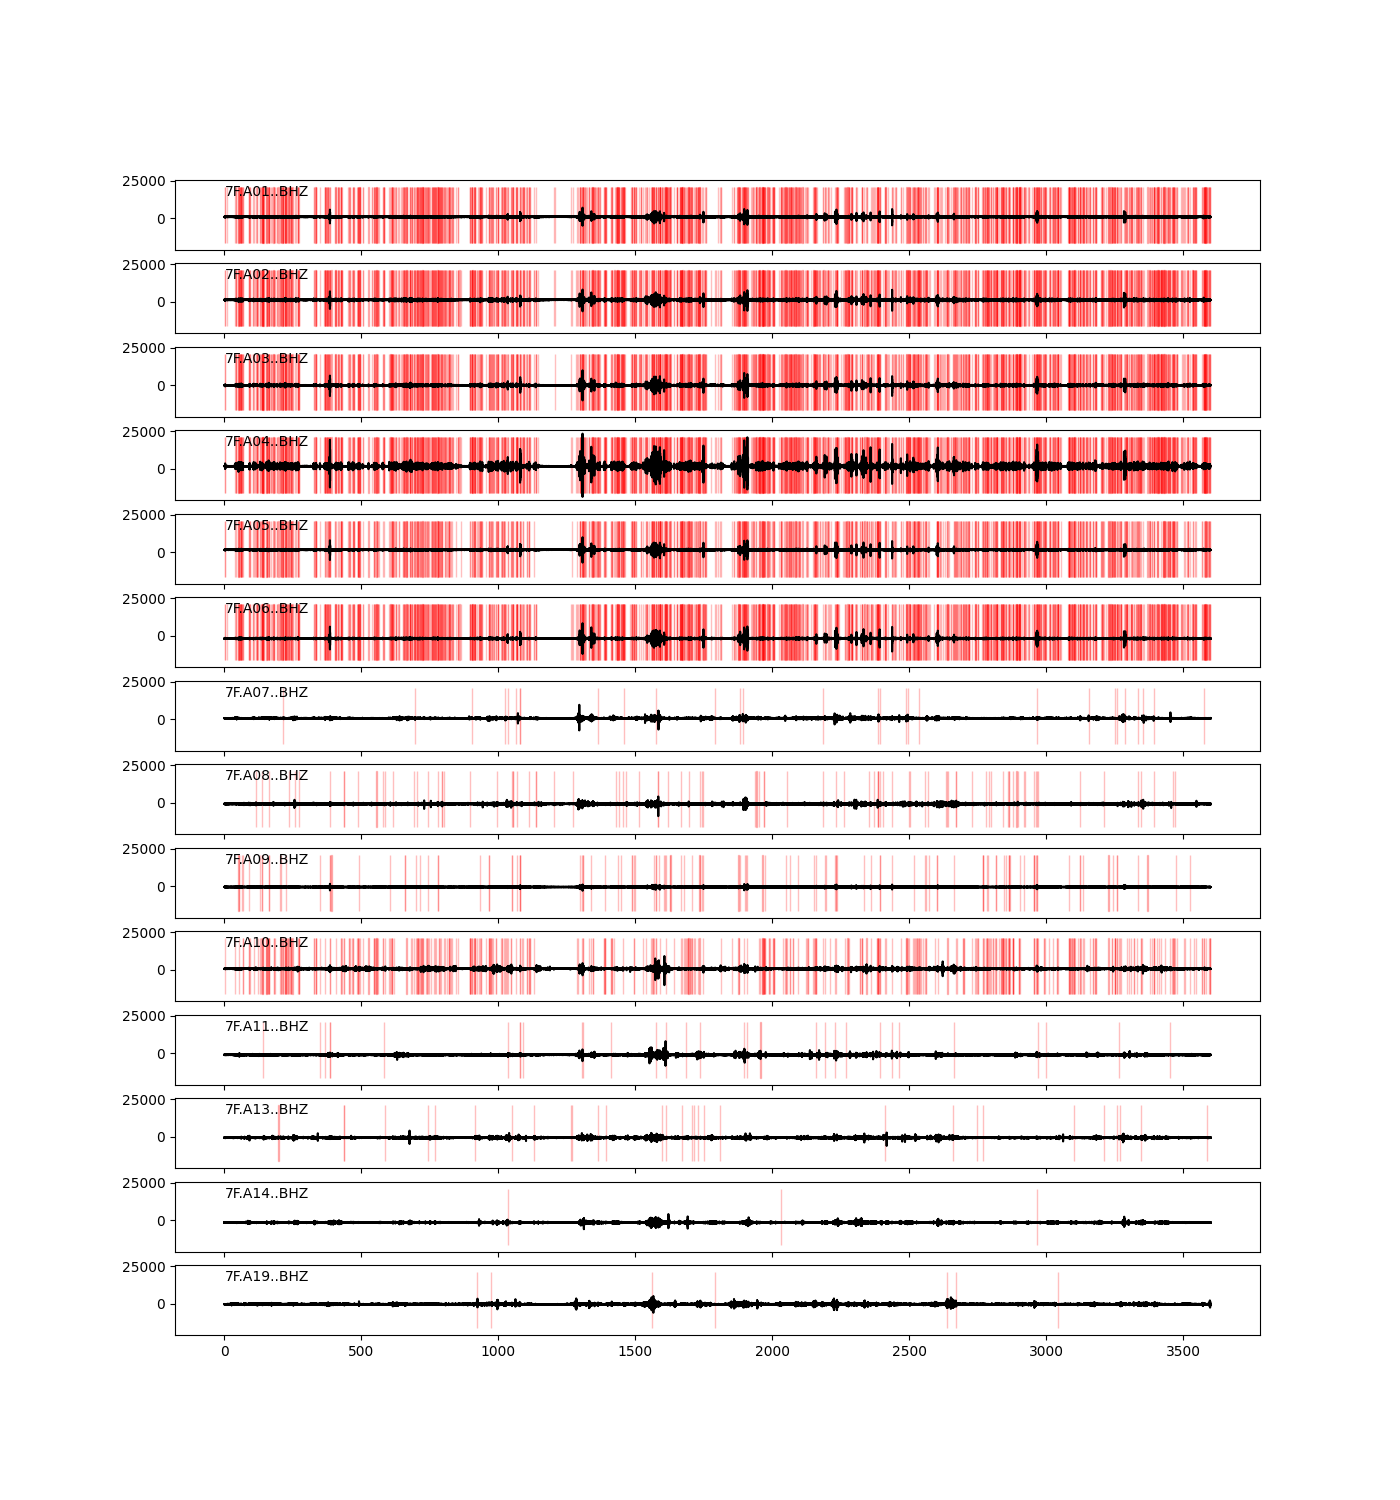

In [10]:
axes_id = dict(np.array([['7F.A01..BHZ' ,'7F.A02..BHZ' , '7F.A03..BHZ' , '7F.A04..BHZ' , '7F.A05..BHZ' , '7F.A06..BHZ' , '7F.A07..BHZ' , '7F.A08..BHZ' , '7F.A09..BHZ'  , '7F.A10..BHZ' , '7F.A11..BHZ', '7F.A13..BHZ', '7F.A14..BHZ', '7F.A19..BHZ'],[0,1,2,3,4,5,6,7,8,9,10,11,12,13], ]).transpose())
#axes_id = dict(np.array([['7F.B01..BHZ' ,'7F.B02..BHZ' , '7F.B03..BHZ' , '7F.B04..BHZ' , '7F.B06..BHZ' , '7F.B07..BHZ' , '7F.B08..BHZ' , '7F.B09..BHZ'  , '7F.B10..BHZ' , '7F.B11..BHZ', '7F.B12..BHZ' , '7F.B13..BHZ', '7F.B19..BHZ', '7F.B20..BHZ'],[0,1,2,3,4,5,6,7,8,9,10,11,12,13], ]).transpose())

#axes_id = dict(np.array([['7F.B01..BHZ' ,'7F.B02..BHZ' , '7F.B03..BHZ' , '7F.B04..BHZ' , '7F.B06..BHZ' , '7F.B07..BHZ' , '7F.B08..BHZ' , '7F.B09..BHZ'  , '7F.B10..BHZ' , '7F.B11..BHZ', '7F.B12..BHZ' ,'7F.B13..BHZ','7F.B19..BHZ' '7F.B20..BHZ'],[0,1,2,3,4,5,6,7,8,9,10,11,12,13], ]).transpose())


fig, ax = plt.subplots(len(data), figsize=(len(data), 15), sharex=True, sharey=True)

#fig.text(s='duration (s) = '+str(events.duration), x=0.5, y=0.85, fontsize=15)
#fig.text(s='coincidence sum = '+str(events.coincidence_sum), x=0.5, y=0.69, fontsize=15)
#fig.text(s='starttime = '+str(start_time), x=0.35, y=0.525, fontsize=15)
#props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
for i in np.arange(0, len(data), 1):
    # plot waveform
    ax[i].plot(times_stamp[i]-times_stamp[0][0], waveforms[i], color='black')

    # plot geophone name
    ax[i].text(1, 15000, list(axes_id.keys())[i])
    #ax[i].text(x=1.0, y=20000.0, s="LALALA")
    #ax[i].text(0.1, 0.9,'matplotlib', ha='center', va='center', transform=ax.transAxes)
#ax[i].xaxis.set_major_formatter(PrecisionDateFormatter("%H:%M:%S.{ms}"))
    
## TRYING TO PLOT WHEN TRIGGERED   
for j in range(len(df_time)):
    for id in events.trace_ids.iloc[j]:
        i = int(axes_id[id])
        ax[i].axvspan(df_time[j].timestamp - times_stamp[0][0], df_time[j].timestamp + events.duration[j] - times_stamp[0][0], ymin=0.1, ymax=0.9, alpha=0.25, color='red')


In [ ]:
axes_id.keys()

In [ ]:
events

In [ ]:
df_time = events.time
df_time[0].timestamp
print(df_time[0])
print(df_time[1])
print(df_time[0].timestamp)
print(df_time[1].timestamp)

#print(type(sec))
#td = timedelta(seconds=sec)
#td

In [ ]:
len(df_time)
df_time[123]

In [ ]:
t_mat1 = times_mat[8][1]
t_mat1
#utc_timestamp = t_mat1.replace(tzinfo=timezone.utc).timestamp()

In [ ]:
print(events.time.iloc[8])
print(events.duration.iloc[8])
print(events.time.iloc[8]+events.duration.iloc[8])

In [ ]:
print(events.time[8])
print(events.duration[8])
print(events.time[8]+events.duration[8])

In [ ]:
#times_ev = [t.times for t in events]

In [ ]:
axes_id = dict(np.array([['7F.A01..BHZ' ,'7F.A02..BHZ' , '7F.A03..BHZ' , '7F.A04..BHZ' , '7F.A05..BHZ' , '7F.A06..BHZ' , '7F.A07..BHZ' , '7F.A08..BHZ' , '7F.A10..BHZ' , '7F.A11..BHZ'],[0,1,2,3,4,5,6,7,8,9], ]).transpose())

In [ ]:
events.trace_ids.iloc[8] #iloc[126]

In [ ]:
events.duration.iloc[8]

In [ ]:
events.duration[8]

In [ ]:
3,2,4,5,1,0,8

In [ ]:
len(axes_id)

In [ ]:
events.trace_ids

In [ ]:
len(events.trace_ids)

In [ ]:
len(events.trace_ids[2])